In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Reading the insurance premiums dataset

In [2]:
df =  pd.read_excel('non-life-insurance-premiums-paid-over-the-years.xlsx', skiprows=1)
df.columns = df.columns.astype(str)
df = df.loc[:, ~df.columns.str.startswith('Unnamed')]

visualizing the top features of the dataset

In [3]:
df.head()

,Class,2013,2014,2015,2016,2017,2018,2019
0,Fire Insurance,62603177,67750306,74131158,80333217,85134824,95586864,114582395
1,Marine/Aviation,24525654,26782156,28702481,28495203,33486010,33193324,39773828
2,Motor Insurance,100658510,107463164,118005766,119870156,129100946,144415552,150121293
3,Liability Insurance,13091273,8241291,10028898,10593386,14003356,15123122,17395200
4,Workers Compensation,14201336,19474646,20005926,19247580,15786482,13815096,16046413


To check for the descriptive stats of the dataset and the observation is that the count of each values of the same and they are all equal

In [4]:
df.describe()

,2013,2014,2015,2016,2017,2018,2019
count,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01
mean,5.856483e+07,6.405683e+07,7.740466e+07,7.503049e+07,8.453898e+07,9.499418e+07,1.033580e+08
std,9.593116e+07,1.048626e+08,1.276369e+08,1.227907e+08,1.380981e+08,1.554790e+08,1.687908e+08
min,7.133529e+06,8.241291e+06,4.618000e+04,8.700269e+06,9.094548e+06,1.082674e+07,1.604641e+07
25%,1.392382e+07,1.697515e+07,1.001705e+07,1.708403e+07,1.534070e+07,1.479612e+07,1.862378e+07
50%,2.789845e+07,2.909678e+07,3.311709e+07,3.512576e+07,3.920618e+07,4.145056e+07,3.805606e+07
75%,4.212496e+07,5.315256e+07,7.956212e+07,6.680796e+07,8.455836e+07,9.736792e+07,1.096715e+08
max,3.513890e+08,3.843410e+08,4.644280e+08,4.501829e+08,5.072339e+08,5.699651e+08,6.201480e+08


to check for the column names 

In [5]:
df.columns

Index(['Class', '2013', '2014', '2015', '2016', '2017', '2018', '2019'], dtype='object')

Below gives analysis on the stats of the data and also plots various graphs of distribution

                  Class       2013       2014       2015       2016  \
0        Fire Insurance   62603177   67750306   74131158   80333217   
1       Marine/Aviation   24525654   26782156   28702481   28495203   
2       Motor Insurance  100658510  107463164  118005766  119870156   
3   Liability Insurance   13091273    8241291   10028898   10593386   
4  Workers Compensation   14201336   19474646   20005926   19247580   

        2017       2018       2019  
0   85134824   95586864  114582395  
1   33486010   33193324   39773828  
2  129100946  144415552  150121293  
3   14003356   15123122   17395200  
4   15786482   13815096   16046413  
               2013          2014          2015          2016          2017  \
count  1.200000e+01  1.200000e+01  1.200000e+01  1.200000e+01  1.200000e+01   
mean   5.856483e+07  6.405683e+07  7.740466e+07  7.503049e+07  8.453898e+07   
std    9.593116e+07  1.048626e+08  1.276369e+08  1.227907e+08  1.380981e+08   
min    7.133529e+06  8.241291e+06  

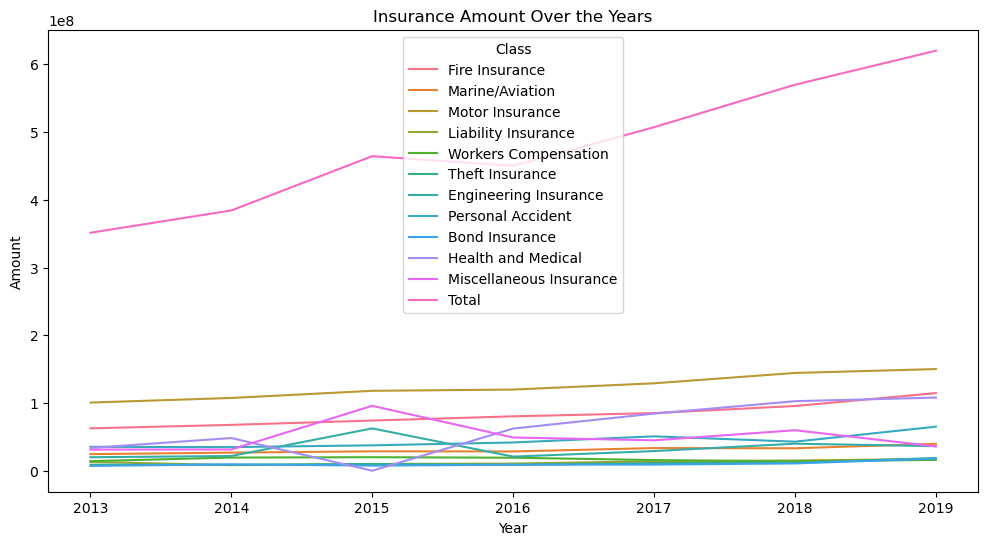

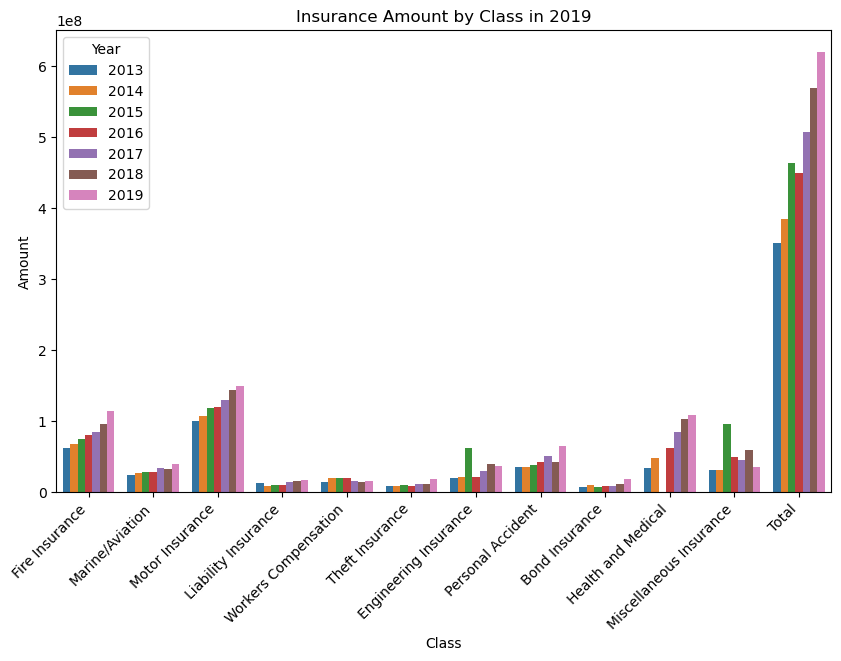

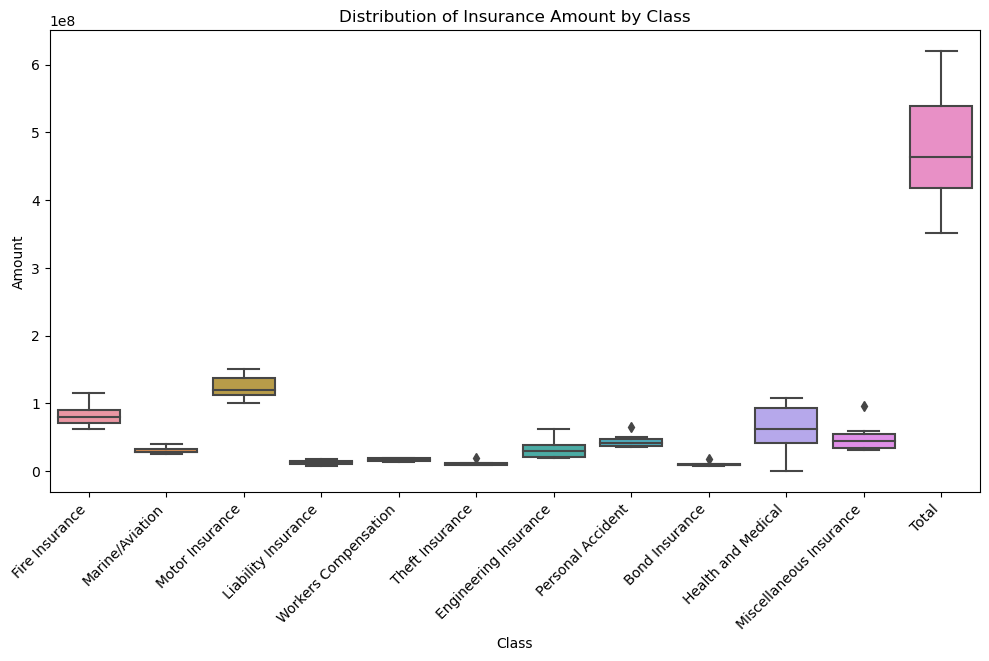

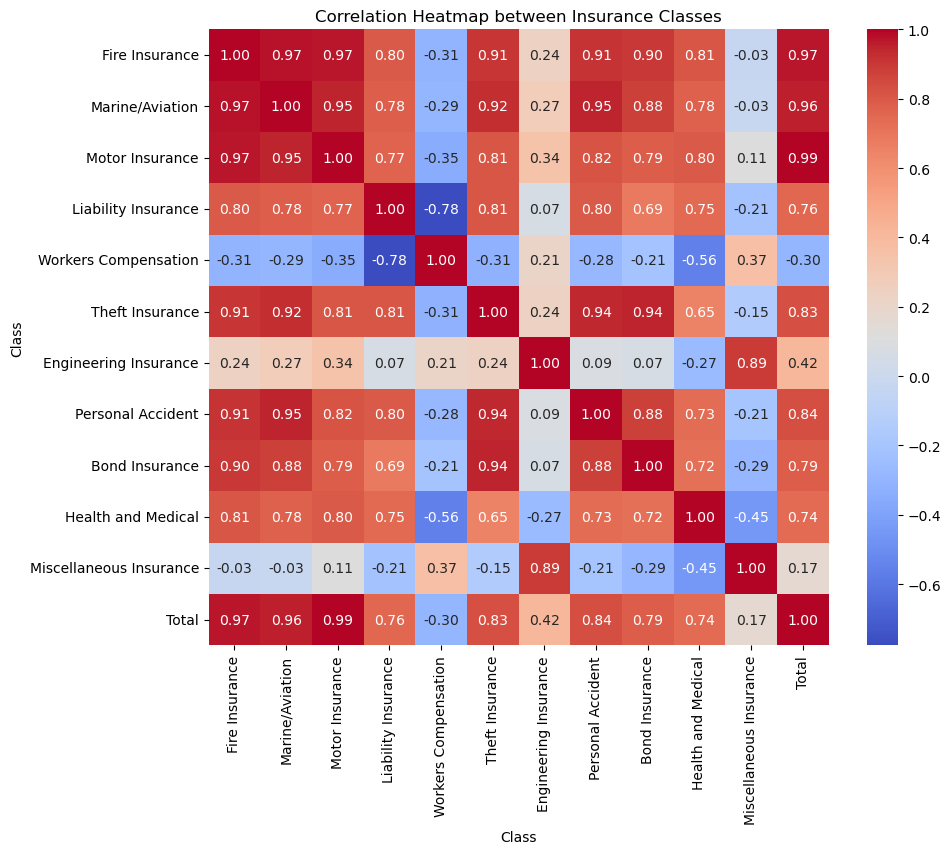

In [6]:
# Displaying the first few rows of the DataFrame
print(df.head())

# Summary statistics
print(df.describe())

# Line plot for each class over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=df.melt(id_vars='Class', var_name='Year', value_name='Amount'), x='Year', y='Amount', hue='Class')
plt.title('Insurance Amount Over the Years')
plt.show()

# Bar plot for each class in a specific year (e.g., 2019)
plt.figure(figsize=(10, 6))
sns.barplot(data=df.melt(id_vars='Class', var_name='Year', value_name='Amount'), x='Class', y='Amount', hue='Year')
plt.title('Insurance Amount by Class in 2019')
plt.xticks(rotation=45, ha='right')
plt.show()

# Box plot for each class
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.melt(id_vars='Class', var_name='Year', value_name='Amount'), x='Class', y='Amount')
plt.title('Distribution of Insurance Amount by Class')
plt.xticks(rotation=45, ha='right')
plt.show()

# Heatmap for correlation between classes
correlation_matrix = df.set_index('Class').T.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap between Insurance Classes')
plt.show()


Checking for correlation to see which classes move in the same or different directions with others. This allows for proper analysis 

In [7]:
# Exclude the "Total" variable from the correlation analysis
df_without_total = df[df['Class'] != 'Total']

# Calculate pairwise correlation coefficients
correlation_matrix = df_without_total.set_index('Class').T.corr()

# Display strong correlations (absolute correlation > 0.7)
strong_correlations = (correlation_matrix.abs() > 0.7) & (correlation_matrix.abs() < 1.0)
strong_correlation_pairs = []

for class_1 in strong_correlations.index:
    for class_2 in strong_correlations.columns:
        if strong_correlations.loc[class_1, class_2]:
            strong_correlation_pairs.append((class_1, class_2))

print("Strongly correlated classes:")
for pair in strong_correlation_pairs:
    print(f"{pair[0]} and {pair[1]}")


Strongly correlated classes:
Fire Insurance and Marine/Aviation
Fire Insurance and Motor Insurance
Fire Insurance and Liability Insurance
Fire Insurance and Theft Insurance
Fire Insurance and Personal Accident
Fire Insurance and Bond Insurance
Fire Insurance and Health and Medical
Marine/Aviation and Fire Insurance
Marine/Aviation and Motor Insurance
Marine/Aviation and Liability Insurance
Marine/Aviation and Theft Insurance
Marine/Aviation and Personal Accident
Marine/Aviation and Bond Insurance
Marine/Aviation and Health and Medical
Motor Insurance and Fire Insurance
Motor Insurance and Marine/Aviation
Motor Insurance and Liability Insurance
Motor Insurance and Theft Insurance
Motor Insurance and Personal Accident
Motor Insurance and Bond Insurance
Motor Insurance and Health and Medical
Liability Insurance and Fire Insurance
Liability Insurance and Marine/Aviation
Liability Insurance and Motor Insurance
Liability Insurance and Workers Compensation
Liability Insurance and Theft Insura

The heatmap shows the correlations between 11 different insurance classes. The correlation coefficient is a measure of the strength of the linear relationship between two variables. A correlation coefficient of 1.0 indicates a perfect positive correlation, meaning that as one variable increases, the other variable also increases. A correlation coefficient of -1.0 indicates a perfect negative correlation, meaning that as one variable increases, the other variable decreases. A correlation coefficient of 0.0 indicates no correlation between the two variables.

The heatmap shows that there are several strong positive correlations between the insurance classes. For example, there is a strong positive correlation between fire insurance and marine/aviation insurance (0.97), fire insurance and motor insurance (0.97), and fire insurance and theft insurance (0.91). This means that these insurance classes tend to move together. For example, if there is an increase in the number of fire insurance claims, there is likely to be an increase in the number of marine/aviation insurance claims, motor insurance claims, and theft insurance claims.

There are also a few strong negative correlations between the insurance classes. For example, there is a strong negative correlation between liability insurance and workers compensation insurance (-0.78). This means that these insurance classes tend to move in opposite directions. For example, if there is an increase in the number of liability insurance claims, there is likely to be a decrease in the number of workers compensation insurance claims.

In [8]:
df.columns

Index(['Class', '2013', '2014', '2015', '2016', '2017', '2018', '2019'], dtype='object')

##### Total Insurance Amount Over the Years:

Calculating the total insurance amount for each year and visualize how it has changed over time. This can provide an overall view of the insurance market in Uganda.

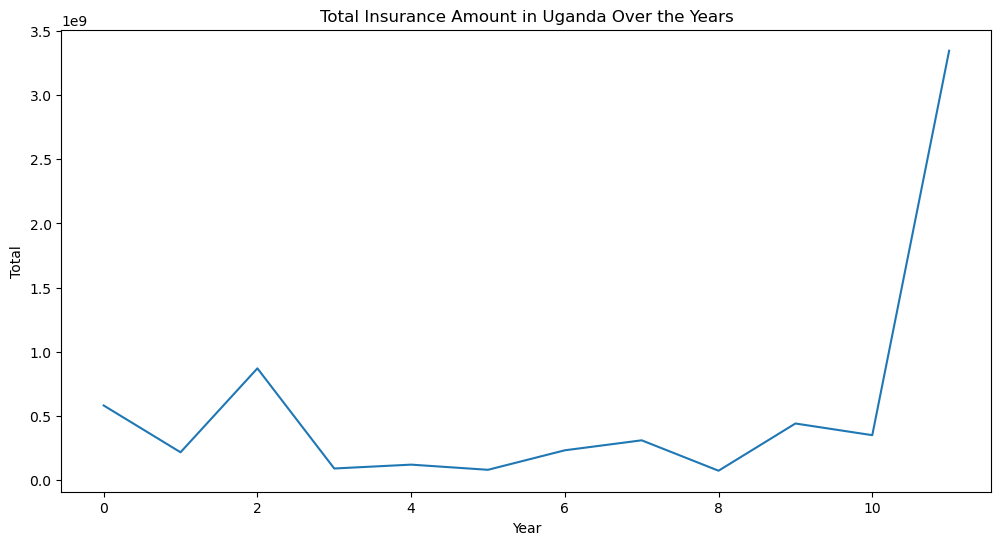

In [9]:
# Convert the numeric columns to numeric, ignoring non-numeric values
numeric_columns = df.columns.difference(['Class'])
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Reset the index to make 'Year' a regular column
df_reset = df.reset_index()

# Add a 'Total' column by summing numeric columns
df_reset['Total'] = df_reset[numeric_columns].sum(axis=1)

# Plot the total insurance amount over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_reset, x='index', y='Total')  # 'index' is the default name for the original index column after reset
plt.title('Total Insurance Amount in Uganda Over the Years')
plt.xlabel('Year')
plt.show()


#### Overall, the graph  shows a positive trend in insurance uptake in Uganda. 

##### Insurance Class Distribution:

Exploring the distribution of insurance amounts across different classes in a specific year. This can help identify which classes contribute the most to the total insurance amount.

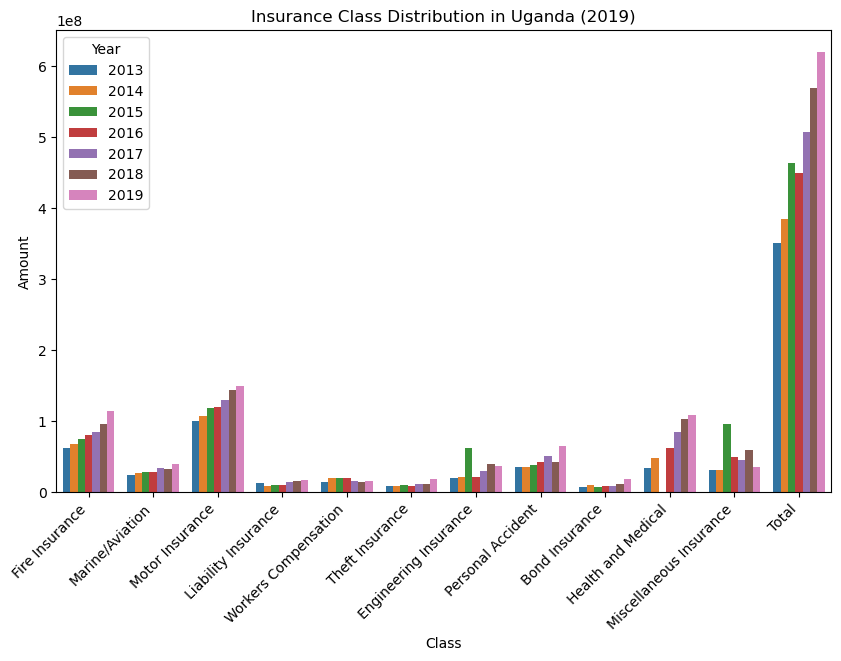

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df.melt(id_vars='Class', var_name='Year', value_name='Amount'), x='Class', y='Amount', hue='Year')
plt.title('Insurance Class Distribution in Uganda (2019)')
plt.xticks(rotation=45, ha='right')
plt.show()


##### The graph shows that the most popular insurance class in Uganda in 2019 was motor insurance, which accounted for the largest total amount of insurance. This is likely due to the fact that there were a large number of vehicles on the road in Uganda, and motor insurance is required by law.

##### The next most popular insurance class was health and medical insurance, which accounted for approx. 14.9% of the total amount of insurance. This is likely due to the fact that the cost of healthcare is rising in Uganda, and people are increasingly looking for ways to protect themselves from financial hardship in the event of an illness or injury.

##### Insurance Class Contributions:

Exploring the contribution of each insurance class to the total amount in a specific year 2019

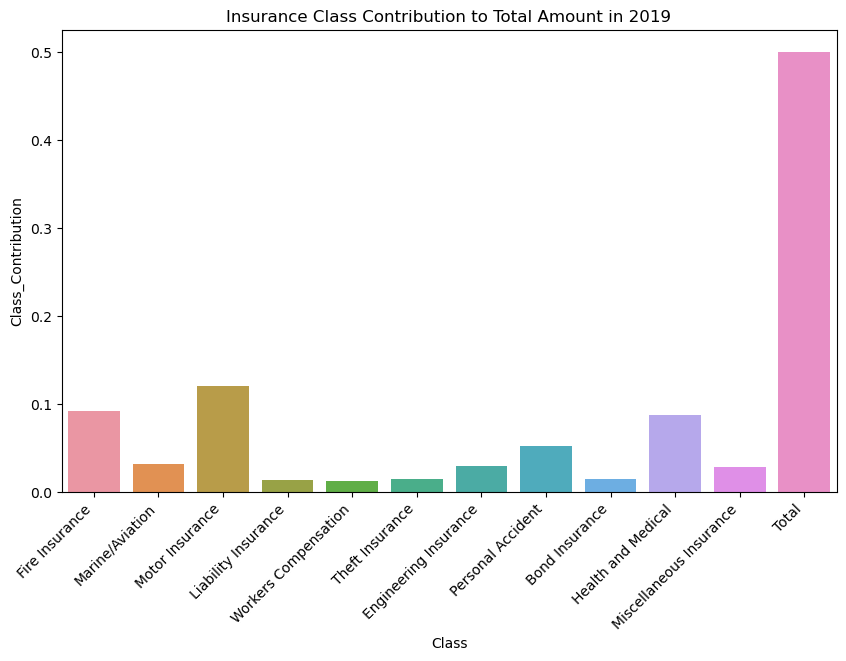

In [11]:
df_class_contribution = df.melt(id_vars='Class', var_name='Year', value_name='Amount')
df_class_contribution['Class_Contribution'] = df_class_contribution['Amount'] / df_class_contribution.groupby('Year')['Amount'].transform('sum')

plt.figure(figsize=(10, 6))
sns.barplot(data=df_class_contribution[df_class_contribution['Year'] == '2019'], x='Class', y='Class_Contribution')
plt.title('Insurance Class Contribution to Total Amount in 2019')
plt.xticks(rotation=45, ha='right')
plt.show()


#### The above graph simplifies the analysis on the uptake of insurance classes in uganda, with the motor insurance being the most that was consumed in 2019

In [12]:
df.columns

Index(['Class', '2013', '2014', '2015', '2016', '2017', '2018', '2019'], dtype='object')

d:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


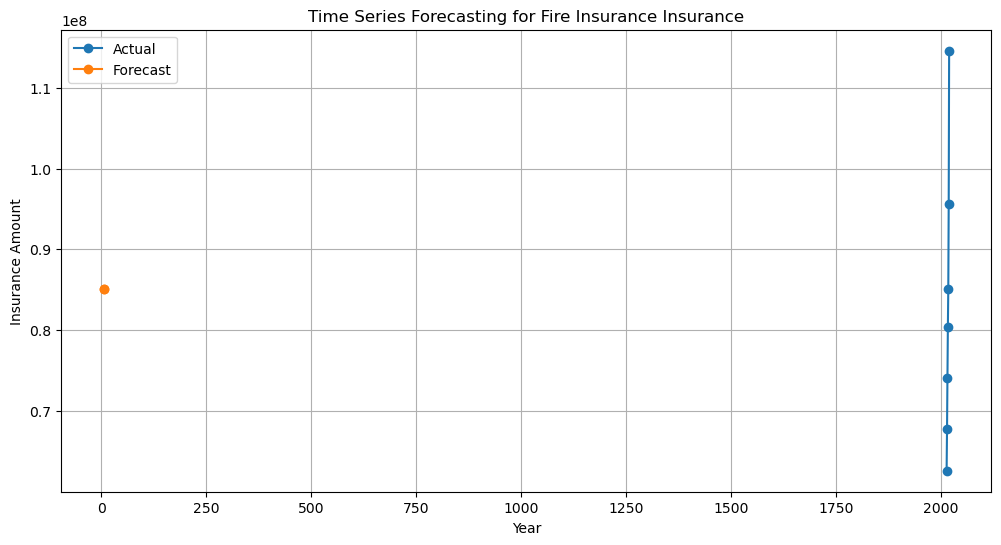

In [13]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assuming df is your DataFrame with the insurance data

# Select the class for which you want to perform time series forecasting
class_name = 'Fire Insurance'
class_data = df[df['Class'] == class_name].iloc[:, 1:].transpose()

# Convert the index (years) to numeric values
class_data.index = class_data.index.astype(int)

# Train-test split (80% for training, 20% for testing)
train_size = int(len(class_data) * 0.8)
train, test = class_data.iloc[:train_size], class_data.iloc[train_size:]

# Fit SARIMA model
order = (1, 1, 1)  # You can adjust these parameters based on model diagnostics
seasonal_order = (1, 1, 1, 12)  # Assuming a seasonal period of 12 (annual data)
model = SARIMAX(train, order=order, seasonal_order=seasonal_order)
result = model.fit(disp=False)

# Forecast future values
forecast_steps = len(test)
forecast = result.get_forecast(steps=forecast_steps)
forecast_index = np.arange(train_size + 1, train_size + forecast_steps + 1)

# Plotting the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(class_data.index, class_data.values, label='Actual', marker='o')
plt.plot(forecast_index, forecast.predicted_mean, label='Forecast', marker='o')
plt.title(f'Time Series Forecasting for {class_name} Insurance')
plt.xlabel('Year')
plt.ylabel('Insurance Amount')
plt.legend()
plt.grid(True)
plt.show()
